In [1]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the Trainning data
train = pd.read_csv('C:/Users/user/Desktop/project/titanic/train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test = pd.read_csv('C:/Users/user/Desktop/project/titanic/test.csv')
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:
df = train.append(test)
df.head()
df.shape

C:\Users\user\AppData\Local\Temp\ipykernel_11892\1006142064.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


(1309, 12)

<AxesSubplot:>

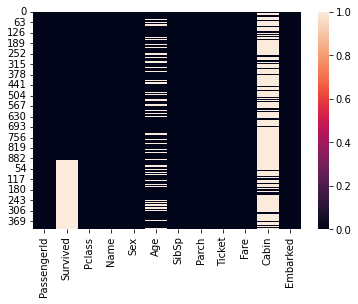

In [7]:
sns.heatmap(df.isnull())

In [8]:
# To see how many null values columnwise
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

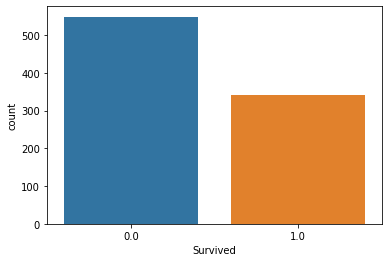

In [9]:
sns.countplot(x='Survived',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

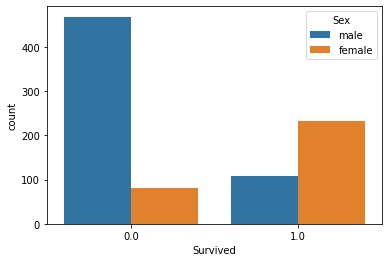

In [10]:
sns.countplot(x='Survived',hue = 'Sex' ,data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

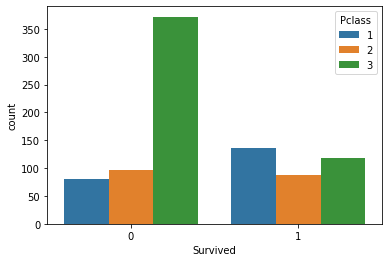

In [11]:
sns.countplot(x='Survived',hue = 'Pclass' ,data = train)

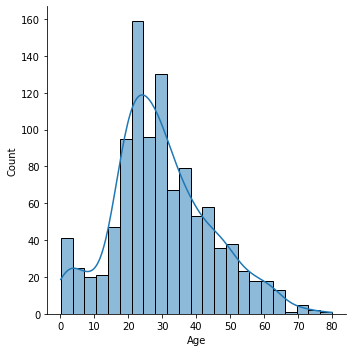

In [12]:
sns.displot(df['Age'].dropna(),kde = True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

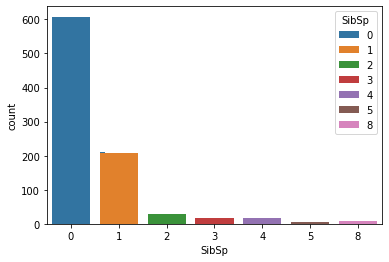

In [13]:
sns.countplot(x='Survived',hue = 'SibSp' ,data = train)
sns.countplot(x='SibSp' ,data = train)


<AxesSubplot:>

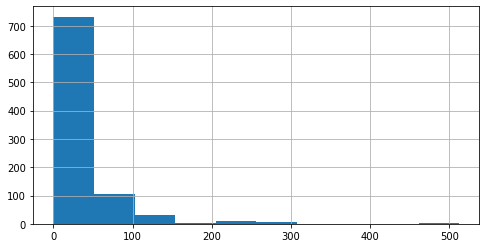

In [14]:
train['Fare'].hist(figsize=(8,4))

# Data Cleaning
#Now we need to clean the data so instead of dropping the value columns we will fill the missing values with mean of passenger class 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

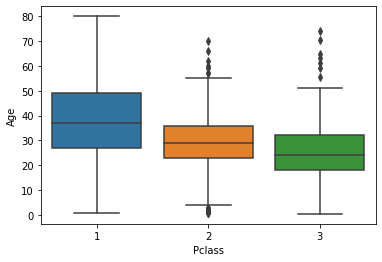

In [16]:
# BOX plot to know the ouliers 
sns.boxplot(x ='Pclass', y = 'Age',data = train)

In [17]:
#Now we'll make a function to fill the missing values

def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass ==2:
            return 28
        if Pclass ==3 :
            return 25
    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(age,axis =1)

<AxesSubplot:>

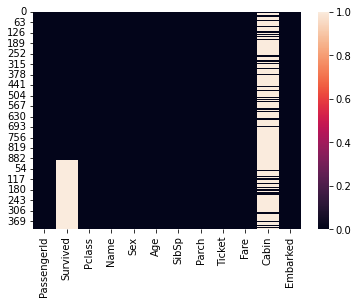

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Cabin columns contains the more the 70% missing values so we have to drop the columns as it'll make problem in prediction
df = df.drop('Cabin',axis = 1)

<AxesSubplot:>

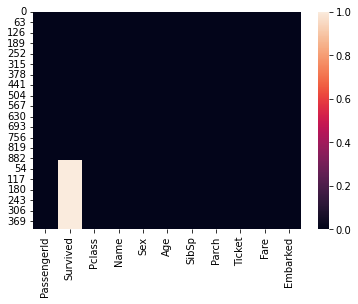

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# sex = pd.get_dummies(train['Sex'],drop_first = True)
# embark = pd.get_dummies(train['Embarked'],drop_first= True)

df['Sex'] = df['Sex'].map({'male':1,'female':0})
df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [25]:
#embark = pd.get_dummies(train['Embarked'],drop_first= True).head()
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2,'nan':3})
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


In [26]:
#df = pd.concat([df,embark],axis =1)
# df.merge(embark,left_on='Fare',right_on='Embarked')
df['Embarked'].fillna(3, inplace = True)
df['Embarked'].unique


<bound method Series.unique of 0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    1.0
Name: Embarked, Length: 1309, dtype: float64>

In [27]:
df['Embarked'].unique()

array([0., 1., 2., 3.])

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,25.0,0,0,A.5. 3236,8.0500,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",1,25.0,0,0,359309,8.0500,0.0


In [29]:
# df.drop(['Embarked'],axis=1,inplace = True)

In [30]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)
df.head()

# Now our Data Is ready for Building the model

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0.0
1,1.0,1,0,38.0,1,0,71.2833,1.0
2,1.0,3,0,26.0,0,0,7.9250,0.0
3,1.0,1,0,35.0,1,0,53.1000,0.0
4,0.0,3,1,35.0,0,0,8.0500,0.0


In [31]:
#fillinng the miising data in Fare column by Median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

<AxesSubplot:>

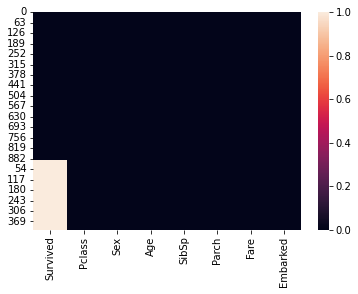

In [32]:
sns.heatmap(df.isnull())

In [33]:
# Test Data
df_test = df[df['Survived'].isnull()]
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,1,34.5,0,0,7.8292,2.0
1,NaN,3,0,47.0,1,0,7.0000,0.0
2,NaN,2,1,62.0,0,0,9.6875,2.0
3,NaN,3,1,27.0,0,0,8.6625,0.0
4,NaN,3,0,22.0,1,1,12.2875,0.0
...,...,...,...,...,...,...,...,...
413,NaN,3,1,25.0,0,0,8.0500,0.0
414,NaN,1,0,39.0,0,0,108.9000,1.0
415,NaN,3,1,38.5,0,0,7.2500,0.0
416,NaN,3,1,25.0,0,0,8.0500,0.0


In [34]:
df_test = df_test.drop('Survived',axis =1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2.0
1,3,0,47.0,1,0,7.0000,0.0
2,2,1,62.0,0,0,9.6875,2.0
3,3,1,27.0,0,0,8.6625,0.0
4,3,0,22.0,1,1,12.2875,0.0
...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,0.0
414,1,0,39.0,0,0,108.9000,1.0
415,3,1,38.5,0,0,7.2500,0.0
416,3,1,25.0,0,0,8.0500,0.0


In [35]:
#Training Data
df_train = df[~df['Survived'].isnull()]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0.0
1,1.0,1,0,38.0,1,0,71.2833,1.0
2,1.0,3,0,26.0,0,0,7.9250,0.0
3,1.0,1,0,35.0,1,0,53.1000,0.0
4,0.0,3,1,35.0,0,0,8.0500,0.0


In [36]:
#Training Data
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0.0
1,1.0,1,0,38.0,1,0,71.2833,1.0
2,1.0,3,0,26.0,0,0,7.9250,0.0
3,1.0,1,0,35.0,1,0,53.1000,0.0
4,0.0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0.0,2,1,27.0,0,0,13.0000,0.0
887,1.0,1,0,19.0,0,0,30.0000,0.0
888,0.0,3,0,25.0,1,2,23.4500,0.0
889,1.0,1,1,26.0,0,0,30.0000,1.0


In [37]:
df_train.shape

(891, 8)

In [38]:
train_data = df_train.drop('Survived',axis =1)
target = df_train['Survived']

In [39]:
train_data


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0
887,1,0,19.0,0,0,30.0000,0.0
888,3,0,25.0,1,2,23.4500,0.0
889,1,1,26.0,0,0,30.0000,1.0


In [40]:
train_data['Embarked'].unique()

array([0., 1., 2., 3.])

#Now our Data is ready for build the model 

# Building a Prediction model

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( train_data,target, test_size=0.30, random_state=80)

In [42]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [44]:
logmodel.fit(X_train,y_train)

In [45]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)

In [46]:
accuracy

array([[139,  23],
       [ 35,  71]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy = accuracy_score(y_test,predictions)
accuracy


# 78% of our pridictions will be correct

0.7835820895522388

In [49]:
# Xtreame Boost
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [50]:
accuracyxgb = accuracy_score(y_test,xgb_pred)
accuracyxgb

0.8097014925373134

In [51]:
# Support Vector Classifier
from sklearn.svm import SVC
classifier = SVC(C = 150,kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)

In [52]:
accuracysvc = accuracy_score(y_test,Y_pred)
accuracysvc

0.7723880597014925

In [53]:
 test_data = logmodel.predict(df_test)
test_data.shape

(418,)

In [97]:
# NAIVE BAYES ALGORITHM

# training the model on training set

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
NB_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, NB_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 76.11940298507463


In [99]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
rfc_pred = rfc.predict(X_test)

In [64]:
from sklearn import metrics
print("Random Forest Classifier  model accuracy(in %):", metrics.accuracy_score(y_test, rfc_pred)*100)

Random Forest Classifier  model accuracy(in %): 81.34328358208955


In [86]:
rfc_test_data = rfc.predict(df_test)
rfc_test_data.shape

(418,)

In [93]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rfc_test_data
    })
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('C:/Users/user/Desktop/project/titanic/submission.csv', index=False)

In [94]:
pd.read_csv('C:/Users/user/Desktop/project/titanic/submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [95]:
submission['Survived'].unique()

array([0, 1])

In [96]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB
